
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import numpy as np

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)
        # Handle cases where standard deviation is zero to avoid division by zero
        self.scale_[self.scale_ == 0] = 1
        return self

    def transform(self, X):
        if not hasattr(self, 'mean_') or not hasattr(self, 'scale_'):
            raise RuntimeError("Scaler not fitted. Call fit() first.")
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [3]:
import numpy as np

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Mean Squared Error Loss with L2 Regularization
            mse_loss = np.mean((y_pred - y)**2)
            l2_reg = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            loss = mse_loss + l2_reg
            self.loss_history.append(loss)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


### Generating Synthetic Data for Linear Regression

In [4]:
# Generate synthetic data for Linear Regression
np.random.seed(42)
X_linear = 2 * np.random.rand(100, 3) # 100 samples, 3 features
# Ensure y_linear has shape (100, 1) by explicitly slicing to keep dimensions
y_linear = 4 + 3 * X_linear[:, 0:1] + 2 * X_linear[:, 1:2] - 5 * X_linear[:, 2:3] + np.random.randn(100, 1) * 2

# Standardize X_linear
scaler_linear = StandardScalerManual()
X_linear_scaled = scaler_linear.fit_transform(X_linear)

print("X_linear shape:", X_linear.shape)
print("y_linear shape:", y_linear.shape)
print("X_linear_scaled sample:\n", X_linear_scaled[:5])

X_linear shape: (100, 3)
y_linear shape: (100, 1)
X_linear_scaled sample:
 [[-0.35958026  1.4198383   0.82216804]
 [ 0.42811633 -1.15479213 -1.18711031]
 [-1.47181267  1.14595419  0.36561862]
 [ 0.81266807 -1.59356748  1.65209819]
 [ 1.24978474 -0.97232681 -1.09700508]]


### Testing Linear Regression Manual Implementation

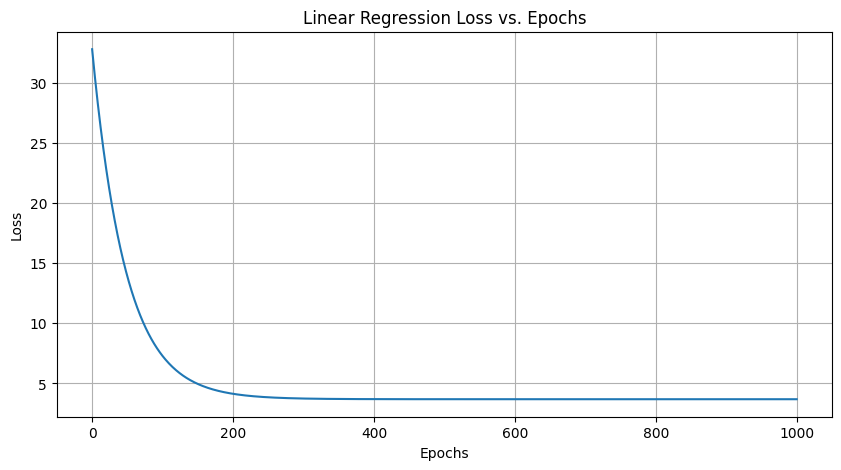

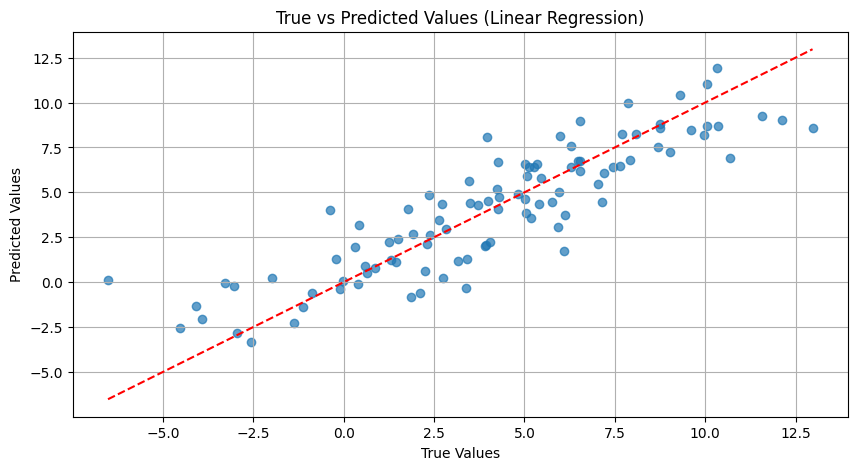

Linear Regression Weights: [ 1.86375651  1.13622927 -2.53720484]
Linear Regression Bias: 4.087388019208791
Final Linear Regression Loss: 3.6872068848526327


In [5]:
model_linear = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model_linear.fit(X_linear_scaled, y_linear.flatten())

plt.figure(figsize=(10, 5))
plt.plot(model_linear.loss_history)
plt.title('Linear Regression Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

y_pred_linear = model_linear.predict(X_linear_scaled)

plt.figure(figsize=(10, 5))
plt.scatter(y_linear, y_pred_linear, alpha=0.7)
plt.plot([y_linear.min(), y_linear.max()], [y_linear.min(), y_linear.max()], 'r--')
plt.title('True vs Predicted Values (Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

print("Linear Regression Weights:", model_linear.weights)
print("Linear Regression Bias:", model_linear.bias)
print("Final Linear Regression Loss:", model_linear.loss_history[-1])




## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [6]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [7]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid activation function
            y_predicted = sigmoid(linear_model)

            # Binary Cross-Entropy Loss with L2 Regularization
            # Add a small epsilon to avoid log(0)
            epsilon = 1e-10
            bce_loss = -np.mean(y * np.log(y_predicted + epsilon) + (1 - y) * np.log(1 - y_predicted + epsilon))
            l2_reg = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            loss = bce_loss + l2_reg
            self.loss_history.append(loss)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_predicted_proba = self.predict_proba(X)
        # Convert probabilities to binary predictions (0 or 1)
        return (y_predicted_proba >= 0.5).astype(int)


X_logistic shape: (100, 2)
y_logistic shape: (100,)
X_logistic_scaled sample:
 [[ 0.25357865 -0.60581154]
 [-0.41791351 -1.09359823]
 [ 1.92692166  1.94573221]
 [-0.57609829 -1.07221493]
 [-0.56048466 -1.06006344]]


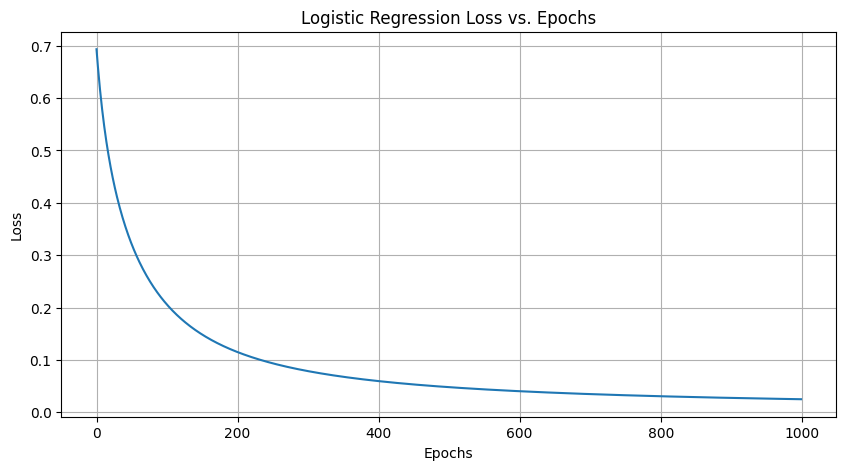

Logistic Regression Accuracy: 1.0000
Logistic Regression Weights: [-2.22472152  4.89231312]
Logistic Regression Bias: 0.0899652602945728
Final Logistic Regression Loss: 0.02494969510072485


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Using sklearn for data generation only

# Generate synthetic data for Logistic Regression (binary classification)
# Using make_classification from sklearn to easily get separable data
X_logistic, y_logistic = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

print("X_logistic shape:", X_logistic.shape)
print("y_logistic shape:", y_logistic.shape)

# Standardize X_logistic using the manual StandardScaler
scaler_logistic = StandardScalerManual()
X_logistic_scaled = scaler_logistic.fit_transform(X_logistic)

print("X_logistic_scaled sample:\n", X_logistic_scaled[:5])

# Initialize and train Logistic Regression model
model_logistic = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model_logistic.fit(X_logistic_scaled, y_logistic)

# Plotting the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(model_logistic.loss_history)
plt.title('Logistic Regression Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Make predictions
y_pred_logistic = model_logistic.predict(X_logistic_scaled)

# Calculate and report final accuracy
accuracy = np.mean(y_pred_logistic == y_logistic)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Logistic Regression Weights:", model_logistic.weights)
print("Logistic Regression Bias:", model_logistic.bias)
print("Final Logistic Regression Loss:", model_logistic.loss_history[-1])


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    # Reshape the matrix M into a 1D array of elements for clustering
    flat_M = M.flatten().reshape(-1, 1)

    # Use sklearn's KMeans for clustering
    # Set n_init explicitly to suppress FutureWarning in scikit-learn 1.4
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(flat_M)

    # Get cluster labels for each element
    labels = kmeans.labels_

    # Reshape labels back to the original matrix shape to form the assignment_table
    assignment_table = labels.reshape(M.shape)

    # Get centroids
    centroids = kmeans.cluster_centers_.flatten()

    # Create the cookbook dictionary
    cookbook = {i: [] for i in range(k)}
    # Iterate through the original matrix to get (i, j) positions for each cluster
    for r in range(M.shape[0]):
        for c in range(M.shape[1]):
            cluster_label = assignment_table[r, c]
            cookbook[cluster_label].append((r, c))

    return assignment_table, cookbook, centroids


Original Matrix M_kmeans:
 [[37.45401188 95.07143064 73.19939418 59.86584842 15.60186404]
 [15.59945203  5.80836122 86.61761458 60.11150117 70.80725778]
 [ 2.05844943 96.99098522 83.24426408 21.23391107 18.18249672]
 [18.34045099 30.4242243  52.47564316 43.19450186 29.12291402]
 [61.18528947 13.94938607 29.21446485 36.63618433 45.60699842]]

Assignment Table:
 [[2 1 1 2 0]
 [0 0 1 2 1]
 [0 1 1 0 0]
 [0 0 2 2 0]
 [2 0 0 2 2]]

Cookbook (Cluster assignments):
 {0: [(0, 4), (1, 0), (1, 1), (2, 0), (2, 3), (2, 4), (3, 0), (3, 1), (3, 4), (4, 1), (4, 2)], 1: [(0, 1), (0, 2), (1, 2), (1, 4), (2, 1), (2, 2)], 2: [(0, 0), (0, 3), (1, 3), (3, 2), (3, 3), (4, 0), (4, 3), (4, 4)]}

Centroids:
 [18.13963407 84.32182441 49.56624734]


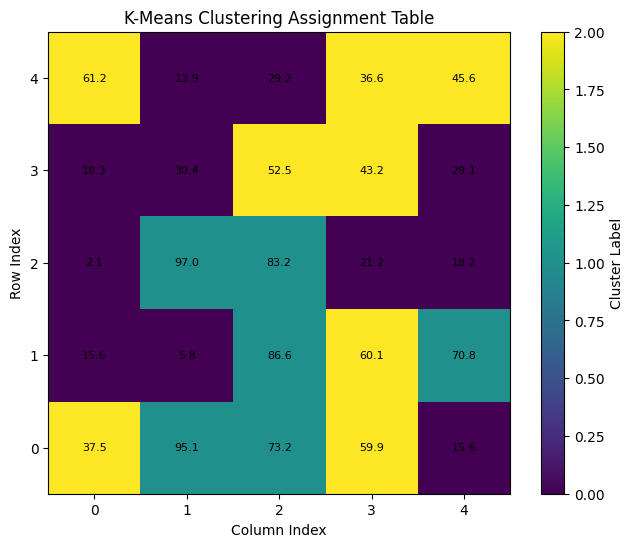

In [10]:
# Generate a random matrix M for K-Means clustering
np.random.seed(42)
M_kmeans = np.random.rand(5, 5) * 100
k_clusters = 3 # Number of clusters

print("Original Matrix M_kmeans:\n", M_kmeans)

assignment_table, cookbook, centroids = kmeans_matrix(M_kmeans, k_clusters)

print("\nAssignment Table:\n", assignment_table)
print("\nCookbook (Cluster assignments):\n", cookbook)
print("\nCentroids:\n", centroids)

#Visualize K-Means clustering (not explicitly asked but good for verification)
plt.figure(figsize=(8, 6))
plt.imshow(assignment_table, cmap='viridis', origin='lower')
plt.colorbar(label='Cluster Label')
plt.title('K-Means Clustering Assignment Table')
for r in range(M_kmeans.shape[0]):
    for c in range(M_kmeans.shape[1]):
        plt.text(c, r, f'{M_kmeans[r,c]:.1f}', ha='center', va='center', color='black', fontsize=8)
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
